# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [171]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Leemos nuestro archivo de entrada `reviews_sentiment`

Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

In [172]:
df = pd.read_csv("data/reviews_sentiment.csv", sep = ";")
df

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating. Realiza otras visualizaciones para ver la relación de tus datos.

<Axes: ylabel='Star Rating'>

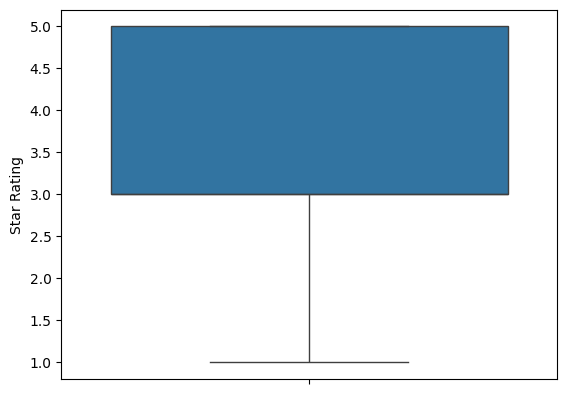

In [173]:
sns.boxplot(data=df, y="Star Rating")

<Axes: ylabel='sentimentValue'>

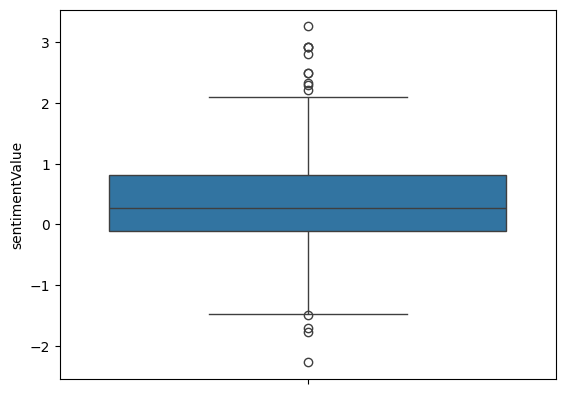

In [174]:
sns.boxplot(data=df, y="sentimentValue")

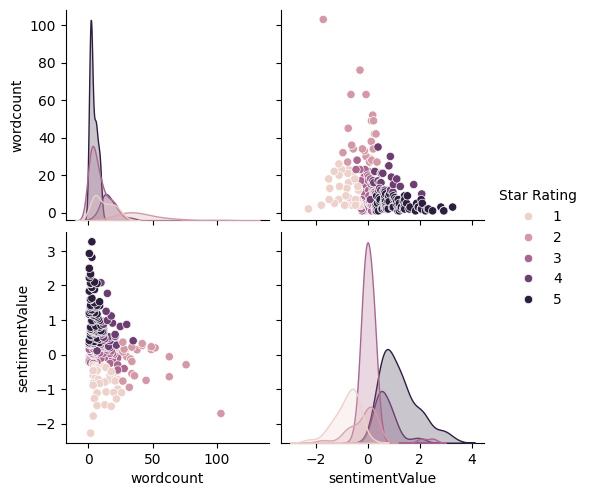

In [175]:
sns.pairplot(data = df, hue = "Star Rating")

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [176]:
X = df[["wordcount","sentimentValue"]]
y = df["Star Rating"]

In [177]:
X

,wordcount,sentimentValue
0,23,-0.486389
1,20,-0.586187
2,4,-0.602240
3,17,-0.616271
4,6,-0.651784
...,...,...
252,3,2.814818
253,1,2.924393
254,1,2.924393
255,1,2.924393


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=12)

In [179]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(205, 2)
(52, 2)
(205,)
(52,)


In [180]:
scaler = MinMaxScaler()
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [181]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

## Creamos el Modelo
Entrena con un KNN y evalúa el error en train y en test

In [182]:
model_knn = KNeighborsClassifier(n_neighbors = 3)

In [183]:
model_knn.fit(X_train_st, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Evalúa tu modelo

In [184]:
pred_knn = model_knn.predict(X_test_st)

In [185]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.67      0.80      0.73         5
           3       0.88      0.88      0.88         8
           4       0.86      0.86      0.86         7
           5       1.00      0.96      0.98        24

    accuracy                           0.90        52
   macro avg       0.85      0.87      0.86        52
weighted avg       0.91      0.90      0.91        52



## ¿Cómo obtener el mejor valor de k? Crea y evalúa nuevos modelos
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

In [186]:
parameters ={"n_neighbors" : [1,3,5,7,9,11]}
grid_search = GridSearchCV(estimator=model_knn, 
                           param_grid=parameters, 
                           cv=3, 
                           scoring='accuracy',
                           verbose = 4)
grid_search.fit(X_train_st, y_train)
print("Mejores Parámetros:", grid_search.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .....................n_neighbors=1;, score=0.870 total time=   0.0s
[CV 2/3] END .....................n_neighbors=1;, score=0.853 total time=   0.0s
[CV 3/3] END .....................n_neighbors=1;, score=0.853 total time=   0.0s
[CV 1/3] END .....................n_neighbors=3;, score=0.855 total time=   0.0s
[CV 2/3] END .....................n_neighbors=3;, score=0.868 total time=   0.0s
[CV 3/3] END .....................n_neighbors=3;, score=0.809 total time=   0.0s
[CV 1/3] END .....................n_neighbors=5;, score=0.855 total time=   0.0s
[CV 2/3] END .....................n_neighbors=5;, score=0.868 total time=   0.0s
[CV 3/3] END .....................n_neighbors=5;, score=0.868 total time=   0.0s
[CV 1/3] END .....................n_neighbors=7;, score=0.855 total time=   0.0s
[CV 2/3] END .....................n_neighbors=7;, score=0.868 total time=   0.0s
[CV 3/3] END .....................n_neighbors=7;,

In [187]:
resultados = pd.DataFrame(grid_search.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001100,0.000316,0.002660,0.001265,1,{'n_neighbors': 1},0.869565,0.852941,0.852941,0.858483,0.007837,2
1,0.000462,0.000339,0.003365,0.002653,3,{'n_neighbors': 3},0.855072,0.867647,0.808824,0.843848,0.025292,4
2,0.001339,0.000471,0.002111,0.000785,5,{'n_neighbors': 5},0.855072,0.867647,0.867647,0.863456,0.005928,1
3,0.000329,0.000465,0.001213,0.000873,7,{'n_neighbors': 7},0.855072,0.867647,0.823529,0.848750,0.018558,3
4,0.000336,0.000475,0.002710,0.002581,9,{'n_neighbors': 9},0.826087,0.852941,0.808824,0.829284,0.018152,5
5,0.000354,0.000500,0.002420,0.002679,11,{'n_neighbors': 11},0.811594,0.838235,0.779412,0.809747,0.024050,6


In [188]:
df_k_vs_accuracy = resultados[['param_n_neighbors', 'mean_test_score']]
df_k_vs_accuracy

,param_n_neighbors,mean_test_score
0,1,0.858483
1,3,0.843848
2,5,0.863456
3,7,0.848750
4,9,0.829284
5,11,0.809747


In [189]:
# Renombrar las columnas para mayor claridad
df_k_vs_accuracy.columns = ['Valor_k', 'Accuracy_Promedio_CV']

# Identificar el mejor k y su accuracy
mejor_k = grid_search.best_params_['n_neighbors']
mejor_accuracy = grid_search.best_score_

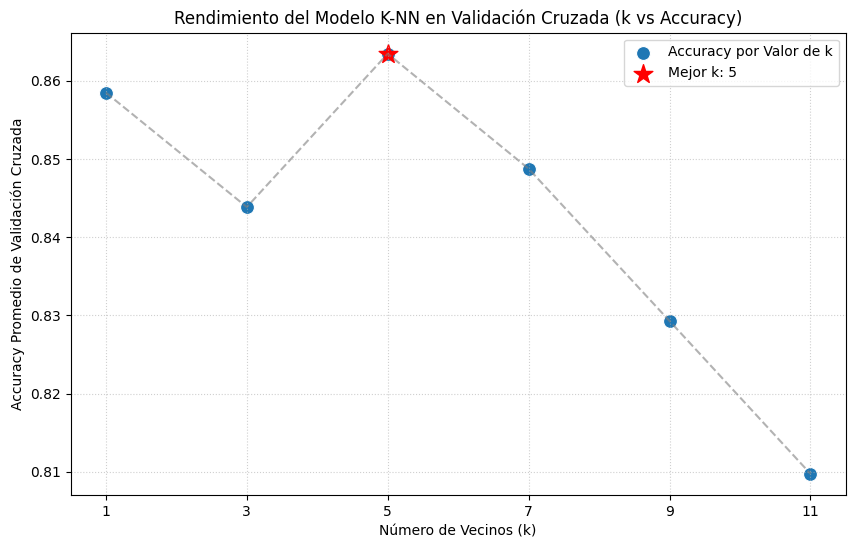

In [190]:
#Crear el Scatter Plot (k vs accuracy)
plt.figure(figsize=(10, 6))

# Dibujar todos los puntos k vs accuracy
sns.scatterplot(x='Valor_k', y='Accuracy_Promedio_CV', data=df_k_vs_accuracy, 
                s=100, label='Accuracy por Valor de k')

# Dibujar una línea que une los puntos para facilitar la visualización de la tendencia
sns.lineplot(x='Valor_k', y='Accuracy_Promedio_CV', data=df_k_vs_accuracy, 
             linestyle='--', color='gray', alpha=0.6)

# Destacar el punto con el mejor k y la máxima precisión
plt.scatter(mejor_k, mejor_accuracy, 
            color='red', s=200, label=f'Mejor k: {mejor_k}', marker='*')

# 4. Configuración del gráfico
plt.title('Rendimiento del Modelo K-NN en Validación Cruzada (k vs Accuracy)')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Accuracy Promedio de Validación Cruzada')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.xticks(df_k_vs_accuracy['Valor_k'].unique()) # Asegura que solo se muestren los valores de k probados
plt.show()

## Predice con nuevos datos.
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [191]:
model_knn_mejor = KNeighborsClassifier(n_neighbors = 5)

In [192]:
model_knn_mejor.fit(X_train_st, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [193]:
datos_nuevos = [[5,1]]
datos_nuevos_escalados = scaler.transform(datos_nuevos)
datos_nuevos_escalados

c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.03921569, 0.54451958]])

In [194]:
prediccion = model_knn_mejor.predict(datos_nuevos_escalados)
prediccion

array([5])